In [14]:
from caveclient import CAVEclient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from standard_transform import minnie_ds
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

datastack_name = 'minnie65_public'
client = CAVEclient(datastack_name)

# Show the description of the datastack
client.info.get_datastack_info()['description']

# see the available materialization versions
client.materialize.get_versions()

versions = sorted(client.materialize.get_versions(), key = lambda v: client.materialize.get_timestamp(v))

for version in versions:
    print(f"Version {version}: {client.materialize.get_timestamp(version)}")

# CAVE always use the same version for consistency
client.version = 1621

Version 117: 2021-06-11 08:10:00.215114+00:00
Version 343: 2022-02-24 08:10:00.184668+00:00
Version 661: 2023-04-06 20:17:09.199182+00:00
Version 795: 2023-08-23 08:10:01.404268+00:00
Version 943: 2024-01-22 08:10:01.497934+00:00
Version 1078: 2024-06-05 10:10:01.203215+00:00
Version 1181: 2024-09-16 10:10:01.121167+00:00
Version 1300: 2025-01-13 10:10:01.286229+00:00
Version 1412: 2025-04-29 10:10:01.200893+00:00
Version 1507: 2025-07-31 08:10:01.117494+00:00
Version 1621: 2025-11-25 08:10:01.094430+00:00


In [15]:
# creating a box of interest that allows to filter for BC inside the bounding box

bounding_box = [[205809, 146360, 20001], [231809, 176360, 22501]] # the coordinates are in voxels | center point coordinates [218809, 161360, 21251]
box_df = client.materialize.tables.aibs_metamodel_celltypes_v661(cell_type = 'BC', pt_position_bbox = bounding_box).query(split_positions = True) # split positions true to prepare for further steps (coordinates)
print(box_df)

    id_ref                      created_ref  valid_ref  target_id  \
0    36015 2023-12-19 22:46:35.830259+00:00       True     332970   
1    41934 2023-12-19 22:48:37.780356+00:00       True     365738   
2    41956 2023-12-19 22:48:38.103194+00:00       True     365783   
3    36105 2023-12-19 22:47:06.908616+00:00       True     333213   
4    41945 2023-12-19 22:48:37.940706+00:00       True     365763   
5    41201 2023-12-19 22:48:25.359478+00:00       True     363375   
6    41929 2023-12-19 22:48:37.710212+00:00       True     365732   
7    41242 2023-12-19 22:48:25.910750+00:00       True     363533   
8    41911 2023-12-19 22:48:37.459233+00:00       True     365668   
9    36003 2023-12-19 22:46:35.674368+00:00       True     332943   
10   41936 2023-12-19 22:48:37.809503+00:00       True     365740   

   classification_system cell_type      id                          created  \
0      inhibitory_neuron        BC  332970 2020-09-28 22:40:44.479358+00:00   
1      inhibi

In [16]:
# Pick example cell
example_root_id = box_df['pt_root_id'].tolist()

from functions import inputs, outputs

cell_type_pre_df, _ = inputs(client, example_root_id) # Unterstrich ignores the second return from functions.py
cell_type_post_df, _ = outputs(client, example_root_id)

print('inputs', cell_type_pre_df)
print('outputs', cell_type_post_df)

Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .
Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .


inputs      cell_type  pt_position_x  pt_position_y  pt_position_z  \
0     pericyte         136528         190992          20716   
1        6P-CT         227680         225232          24009   
2           BC         227104         207840          20841   
3     pericyte         243328         173648          20152   
4           MC         228160         123696          25591   
...        ...            ...            ...            ...   
4139     5P-ET         304160         185008          17299   
4140     5P-ET         230976         187184          27497   
4141     5P-ET         247504         188912          23618   
4142     5P-ET         248848         196528          21127   
4143     5P-ET         234752         204192          23468   

        pt_supervoxel_id          pt_root_id  
0      83545154824542224  864691135418206394  
1      96075395895966423  864691136662334942  
2      96002690286851358  864691136276011533  
3      98249885828269697  864691135418206394  
4

In [17]:
# PRAESYNAPTIC

from functions import analysis
analysis(cell_type_pre_df)

Total number of neurons (without Glia and Vascular Cells): 3346

Excitatory: 2606
Inhibitory: 740

Percentage by CELL type:
all cells
Excitatory Neurons      62.8861
Inhibitory Neurons    17.857143
Glia Cells            11.221042
Vascular Cells         8.035714
Name: percent of cell types, dtype: Float64

Percentage by NEURON type:
only neurons
Excitatory Neurons    77.884041
Inhibitory Neurons    22.115959
X                           0.0
Name: percent of neurons, dtype: Float64

Results:
           count  percent of all cells               group  \
cell_type                                                    
23P          792             19.111969  Excitatory Neurons   
4P          1268             30.598456  Excitatory Neurons   
5P-ET         70              1.689189  Excitatory Neurons   
5P-IT        346              8.349421  Excitatory Neurons   
5P-NP         10              0.241313  Excitatory Neurons   
6P-CT         50              1.206564  Excitatory Neurons   
6P-IT     

In [18]:
# POSTSYNAPTIC

from functions import analysis
analysis(cell_type_post_df)

Total number of neurons (without Glia and Vascular Cells): 10255

Excitatory: 9169
Inhibitory: 1086

Percentage by CELL type:
all cells
Excitatory Neurons    85.261298
Inhibitory Neurons    10.098568
Vascular Cells         3.022131
Glia Cells             1.618003
Name: percent of cell types, dtype: Float64

Percentage by NEURON type:
only neurons
Excitatory Neurons    89.410044
Inhibitory Neurons    10.589956
X                           0.0
Name: percent of neurons, dtype: Float64

Results:
           count  percent of all cells               group  \
cell_type                                                    
23P         3845             35.754138  Excitatory Neurons   
4P          3419             31.792821  Excitatory Neurons   
5P-ET        305              2.836154  Excitatory Neurons   
5P-IT       1075               9.99628  Excitatory Neurons   
5P-NP         15              0.139483  Excitatory Neurons   
6P-CT        241              2.241027  Excitatory Neurons   
6P-IT   

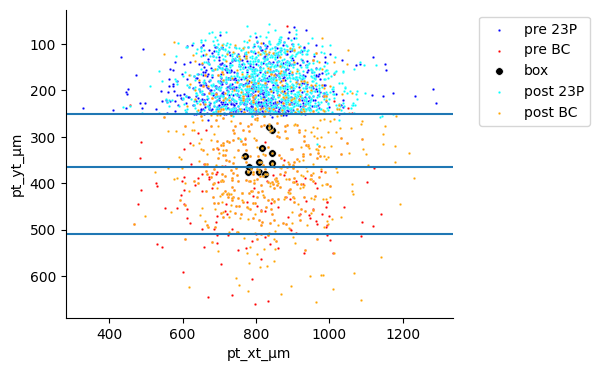

In [19]:
# let´s see how a certain cell type is distributed throughout the dataset (in this case 23P)

# filtering for 23P

my_type_23p = '23P'
post_py_df = cell_type_post_df[cell_type_post_df['cell_type'] == my_type_23p].copy()

my_type_bc = 'BC'
post_bc_df = cell_type_post_df[cell_type_post_df['cell_type'] == my_type_bc].copy()

pre_py_df = cell_type_pre_df[cell_type_pre_df['cell_type'] == my_type_23p].copy()
pre_bc_df = cell_type_pre_df[cell_type_pre_df['cell_type'] == my_type_bc].copy()

from functions import conversion_five, leveling_five, twod_graph_pybcbox, twod_graph_pybcbox

conversion_five(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df)
leveling_five(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df)

twod_graph_pybcbox(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df, 792, 430, 11, 1000, 609, 'pre 23P', 'pre BC', 'box', 'post 23P', 'post BC', 250, 365, 510) # post py size downsized
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

#plt.savefig('23P.png', dpi = 600, bbox_inches = 'tight')

# # 3D

# fig = plt.figure(figsize = (12, 10))
# ax = fig.add_subplot(projection = '3d')

# from functions import conversion_five, leveling_five, threed_graph_five
# conversion_five(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df)
# leveling_five(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df)
# threed_graph_five(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df, 792, 430, 11, 1000, 609, 'pre 23P', 'pre BC', 'box', 'post 23P', 'post BC', ax)

# plt.show()

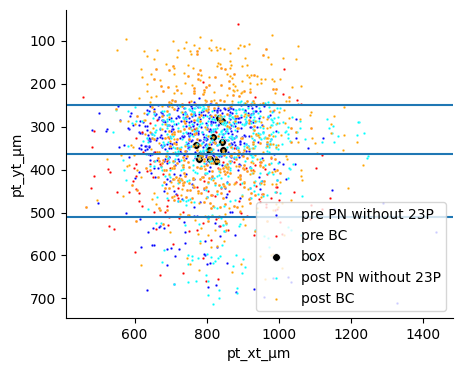

In [20]:
# all other cells

my_type_one = '4P', '5P-ET', '5P-IT', '5P-NP', '6P-CT', '6P-IT'
post_py_df = cell_type_post_df[cell_type_post_df['cell_type'].isin(my_type_one)].copy()

my_type_bc = 'BC'
post_bc_df = cell_type_post_df[cell_type_post_df['cell_type'] == my_type_bc].copy()

pre_py_df = cell_type_pre_df[cell_type_pre_df['cell_type'].isin(my_type_one)].copy()
pre_bc_df = cell_type_pre_df[cell_type_pre_df['cell_type'] == my_type_bc].copy()


from functions import conversion_five, leveling_five, twod_graph_pybcbox, twod_graph_pybcbox

conversion_five(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df)
leveling_five(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df)

twod_graph_pybcbox(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df, 500, 430, 11, 500, 609, 'pre PN without 23P', 'pre BC', 'box', 'post PN without 23P', 'post BC', 250, 365, 510) # post pn size downsized

#plt.savefig('otherP.png', dpi  = 600, bbox_inches = 'tight')

# # 3D

# fig = plt.figure(figsize = (12, 10))
# ax = fig.add_subplot(projection = '3d')

# from functions import conversion_five, leveling_five, threed_graph_five
# conversion_five(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df)
# leveling_five(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df)
# threed_graph_five(pre_py_df, pre_bc_df, box_df, post_py_df, post_bc_df, 500, 430, 11, 500, 609, 'pre PN without 23P', 'pre BC', 'box', 'post PN without 23P', 'post BC', ax)

# plt.show()

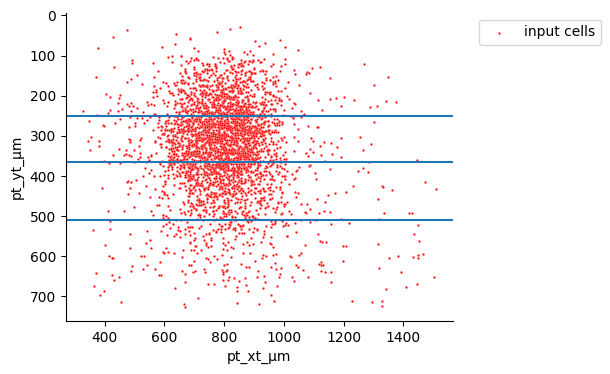

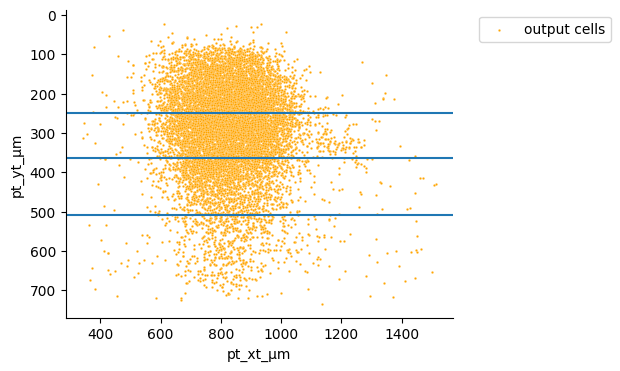

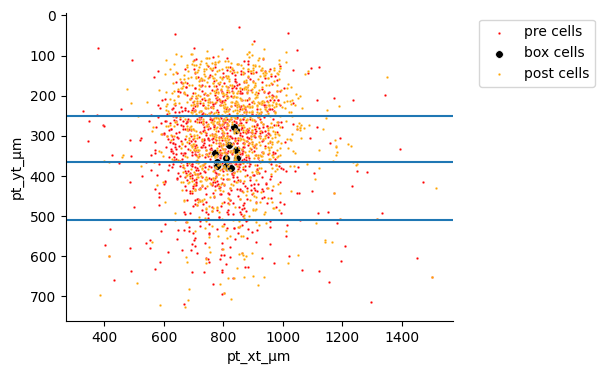

In [21]:
# now lets do the same thing for all pre and post synaptic partners

post_df = cell_type_post_df.copy()

pre_df = cell_type_pre_df.copy()

from functions import conversion_three, leveling_three, twod_graph, twod_graph_inboxout
conversion_three(pre_df, box_df, post_df)
leveling_three(pre_df, box_df, post_df)

twod_graph(pre_df, 3346, 'red', 'input cells', 250, 365, 510)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

twod_graph(post_df, 10255, 'orange', 'output cells', 250, 365, 510)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

twod_graph_inboxout(pre_df, box_df, post_df, 1000, 11, 1000, 'pre cells', 'box cells', 'post cells', 250, 365, 510) # pre and post numbers reduced
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

# # 3D

# fig = plt.figure(figsize = (12, 10))
# ax = fig.add_subplot(projection = '3d')

# from functions import threed_graph_three
# threed_graph_three(pre_df, box_df, post_df, 1000, 11, 1000, 'pre cells', 'box cells', 'post cells', ax)

# plt.show()

Select_columns is deprecated for join queries, please use select_column_map a dictionary which is more explicit about what columns to select from what tables. This query result will attempt to select the first column it finds of this name in any table, but if there are more than one such column it will not select both. Upgrade caveclient to >=5.0.0 .


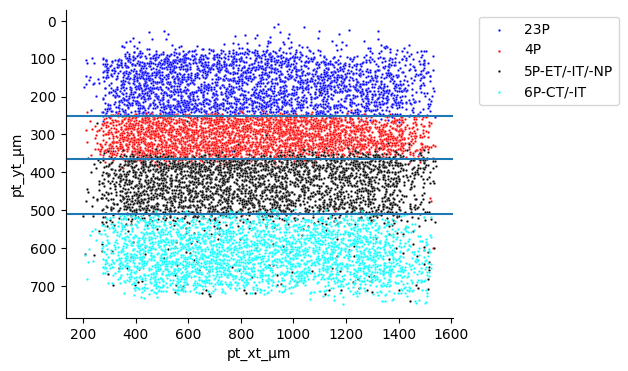

In [22]:
# how deep are the layers? -> let´s look at the differnet pyramidal cells to see aproxiamte layer depth
# cell_type_df -> all cells

cell_type_df = client.materialize.tables.aibs_metamodel_celltypes_v661().query(split_positions = True, select_columns = ['pt_position', 'pt_root_id', 'cell_type'], limit = 1000000)

type_23p = ['23P']
ltwothree = cell_type_df[cell_type_df['cell_type'].isin(type_23p)].copy()

type_4p = ['4P']
lfour = cell_type_df[cell_type_df['cell_type'].isin(type_4p)].copy()

type_5p = ['5P-ET', '5P-IT', '5P-NP']
lfive = cell_type_df[cell_type_df['cell_type'].isin(type_5p)].copy()

type_6p = ['6P-CT', '6P-IT']
lsix = cell_type_df[cell_type_df['cell_type'].isin(type_6p)].copy()

from functions import conversion_four, leveling_four, twod_graph, twod_graph_four
conversion_four(ltwothree, lfour, lfive, lsix)
leveling_four(ltwothree, lfour, lfive, lsix)
twod_graph_four(ltwothree, lfour, lfive, lsix, 3000, 3000, 3000, 3000, '23P', '4P', '5P-ET/-IT/-NP', '6P-CT/-IT', 250, 365, 510) # numbers reduced

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

#plt.savefig('layers.png', dpi  = 600, bbox_inches = 'tight')

In [25]:
# let´s build a box that enlarges to fit the amount of cells that we ask for
# center 218809, 161360, 21251

from functions import enlarging_box_with_cell_type
enlarging_box_with_cell_type(client, 'BC', 5, 218809, 161360, 21251)

number of cells (type: BC ) found: 5


[864691135100935712,
 864691135388235137,
 864691135703068539,
 864691136120689688,
 864691136903064498]

In [26]:
# let´s build a movable box that can be used to filter for specific cells inside

from functions import movable_box_with_cell_type
movable_box_with_cell_type(client, 'BC', 788, 37, 800, 878, 202, 900) # in μm

Found 11 cells of type 'BC'


([864691136723439613,
  864691135440461640,
  864691135720337201,
  864691135740304020,
  864691136618396301,
  864691135463696446,
  0,
  864691135493316191,
  864691135013086454,
  864691135276513765,
  864691135939232260],
     id_ref                      created_ref  valid_ref  target_id  \
 0    45666 2023-12-19 22:49:34.215459+00:00       True     390807   
 1    40000 2023-12-19 22:48:07.881184+00:00       True     359608   
 2    39983 2023-12-19 22:48:07.642144+00:00       True     359575   
 3    39387 2023-12-19 22:47:56.951200+00:00       True     357897   
 4    39403 2023-12-19 22:47:57.187589+00:00       True     357927   
 5    40023 2023-12-19 22:48:08.217754+00:00       True     359653   
 6    39948 2023-12-19 22:48:07.145605+00:00       True     359464   
 7    39968 2023-12-19 22:48:07.418402+00:00       True     359541   
 8    39925 2023-12-19 22:48:06.818418+00:00       True     359400   
 9    39973 2023-12-19 22:48:07.489670+00:00       True     359559   
 10 